The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
#to make everything locally
cf.go_offline()

In [2]:
# Loading the data
titanic_train = pd.read_csv("../data/train.csv")

In [3]:
# Viewing the data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Datatypes of the variables
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#understanding the dataframe-numerical columns
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking null values of all variables
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
px.imshow(titanic_train.isnull())

In [8]:
# shape of the dataframe
titanic_train.shape

(891, 12)

### Understanding1: Dropping Columns
- Since PassengerId and Ticket and Name are variables which doesnt provide any contribution in information gathering/analysis we can drop them
- Also the total rows are 891 out of which 687 cells/data of Cabin is missing wwhich means it is better to drop them

In [9]:
titanic_cleaned = titanic_train.copy()
titanic_cleaned.drop(["PassengerId","Name","Cabin","Ticket"], inplace = True, axis =1)

In [10]:
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Categorical Columns 

In [11]:
#Inspecting Gender
# Inspecting P class
# Inspecting Survived- must only have 0or1
# inspectingEmbarked must have definite portnames
print(titanic_cleaned[["Survived","Sex","Pclass"]].value_counts())
titanic_cleaned.Embarked.value_counts()

Survived  Sex     Pclass
0         male    3         300
                  2          91
1         female  1          91
0         male    1          77
          female  3          72
1         female  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
0         female  2           6
                  1           3
dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Varibale - Survived with entries 0 and 1 only
- Variable - Sex with entries male and female only
- VAriable - Pclass with entries 1,2,3 only
- Varibale - Embarked with three entries S,C,Q

### Converting Categorical Column into numerical column for better understanding - female-1 and male -0
### and Embarked as S=1, C=2,Q=3

In [12]:
# Converting Categorical Column into numerical column for better understanding - female-1 and male -0
titanic_cleaned['Sex'] = titanic_cleaned['Sex'].map({'male':0,'female':1})
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].map({'S':1,'C':2, 'Q':3})

In [13]:
# Validating the datatypes
titanic_cleaned.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

# Age

In [14]:
# Outlier Analysis = Age
px.box(data_frame = titanic_cleaned, y = 'Age', color = 'Sex')

- There were some males who were very much older than the others ie 66 years (from the baove graph, range is from 0-66), we will check them post missing value_treament

In [15]:
# Handling Missing Value:
print("Total missing values in Age Variable", titanic_cleaned.Age.isnull().sum())
px.imshow(titanic_cleaned.isnull())


Total missing values in Age Variable 177


In [16]:
px.histogram(titanic_cleaned, x = 'Age')

- the age is not normally distributed we can impute nan values with just one single mean-median-mode, we need to check whether age has any relation with other variables

In [17]:
px.box(titanic_cleaned, x = 'Embarked', y = 'Age', color = 'Sex')

In [18]:
px.box(titanic_cleaned, x = 'Sex', y = 'Age')

- Median Age for male is 29 and female is 27, Not much significant difference

In [19]:
px.box(titanic_cleaned, x = 'Pclass', y = 'Age', color = 'Sex')

#### IMP: we see that there is some significant relation from the above graph:
- If the Pclass is 1 and Sex is Male the median age is 40
- If the Pclass is 2 and Sex is Male the median age is 30
- If the Pclass is 3 and Sex is Male the median age is 25
- If the Pclass is 1 and Sex is Female the median age is 35
- If the Pclass is 2 and Sex is Female the median age is 28
- If the Pclass is 3 and Sex is Female the median age is 21.5
 

In [20]:
def age_NanTreatment(columns):
    Age = columns[0]
    Pclass = columns[1]
    Sex = columns[2]
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 0:
            return 40
        elif Pclass == 2 and Sex == 0:
            return 30
        elif Pclass == 3 and Sex == 0:
            return 25
        elif Pclass == 1 and Sex == 1:
            return 35
        elif Pclass == 2 and Sex == 1:
            return 28
        elif Pclass == 3 and Sex == 1:
            return 21.5
    else:
        return Age

In [21]:
titanic_cleaned['Age'] = titanic_cleaned[['Age', 'Pclass','Sex']].apply(age_NanTreatment, axis = 1)

In [22]:
px.imshow(titanic_cleaned.isnull())

In [23]:
px.box(titanic_cleaned,y = titanic_cleaned['Age'])

In [24]:
#before Normalising
px.histogram(titanic_cleaned, x = 'Age')

# Fare

In [25]:
# # Outlier Analysis = Fare
px.box(data_frame=titanic_cleaned , y = 'Fare')

- Reading and Assumptions: Assuming that there were some ppl who were travelling on  FREE Pass  and that is wy there fair is adjusted to zero

In [26]:
# Count of outliers
titanic_cleaned[titanic_cleaned.Fare>65]
# we cannot remove 116 rows 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2.0
27,0,1,0,19.0,3,2,263.0000,1.0
31,1,1,1,35.0,1,0,146.5208,2.0
34,0,1,0,28.0,1,0,82.1708,2.0
52,1,1,1,49.0,1,0,76.7292,2.0
...,...,...,...,...,...,...,...,...
846,0,3,0,25.0,8,2,69.5500,1.0
849,1,1,1,35.0,1,0,89.1042,2.0
856,1,1,1,45.0,1,1,164.8667,1.0
863,0,3,1,21.5,8,2,69.5500,1.0


# Embarked

In [27]:
px.imshow(titanic_cleaned.isnull())

In [28]:
titanic_cleaned.dropna(inplace =True)

In [29]:
titanic_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Hurray! Our TrainData is finally Cleaned, we will do the same with test data

In [30]:
# lets check our test data
titanic_test = pd.read_csv('../data/test.csv')
titanic_test.shape

(418, 11)

In [31]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
px.histogram(titanic_test, x = 'Fare')


In [34]:
# Categrical DAta Conversion
titanic_test['Sex'] = titanic_test.Sex.map({'male':0,'female':1})
titanic_test['Embarked'] = titanic_test.Embarked.map({'S':1,'C':2, 'Q':3})
titanic_test['Age'] = titanic_test[['Age', 'Pclass','Sex']].apply(age_NanTreatment, axis = 1)
titanic_test['Fare'] = titanic_test.Fare.fillna(value = titanic_test.Fare.median())
#dropping the columns of least use ['PassengerId','Name','Ticket','Cabin']
test_x = titanic_test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
print(test_x.shape)
test_x.isnull().sum()

(418, 7)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Training the model:::DecisionTrees: We need to decide for passengers in titanic_test whether they survived(1) or not(0)

In [35]:
train_x = titanic_cleaned.drop('Survived', axis =1)
train_y = titanic_cleaned['Survived']


In [36]:
tr_x,te_x,tr_y,te_y = train_test_split(train_x,train_y,random_state=4,test_size=0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier(random_state=7)
dt.fit(tr_x,tr_y)

DecisionTreeClassifier(random_state=7)

In [39]:
pred1 = dt.predict(tr_x)
accuracy_score(tr_y,pred1)

0.9831223628691983

In [40]:
pred2 = dt.predict(te_x)
accuracy_score(te_y,pred2)

0.7865168539325843

[Text(639.3152999344405, 1058.5894736842106, 'X[1] <= 0.5\ngini = 0.469\nsamples = 711\nvalue = [444, 267]'),
 Text(355.54056490384613, 1001.3684210526317, 'X[0] <= 1.5\ngini = 0.298\nsamples = 461\nvalue = [377, 84]'),
 Text(134.62237762237763, 944.1473684210526, 'X[2] <= 36.5\ngini = 0.47\nsamples = 98\nvalue = [61, 37]'),
 Text(46.82517482517483, 886.9263157894737, 'X[5] <= 37.812\ngini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(15.608391608391608, 829.7052631578947, 'X[5] <= 15.644\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(7.804195804195804, 772.4842105263158, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(23.412587412587413, 772.4842105263158, 'X[6] <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(15.608391608391608, 715.2631578947369, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(31.216783216783217, 715.2631578947369, 'X[5] <= 28.875\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(23.412587412587413, 658.042105263158, 'X[2] <= 32.5\ngini = 0.5

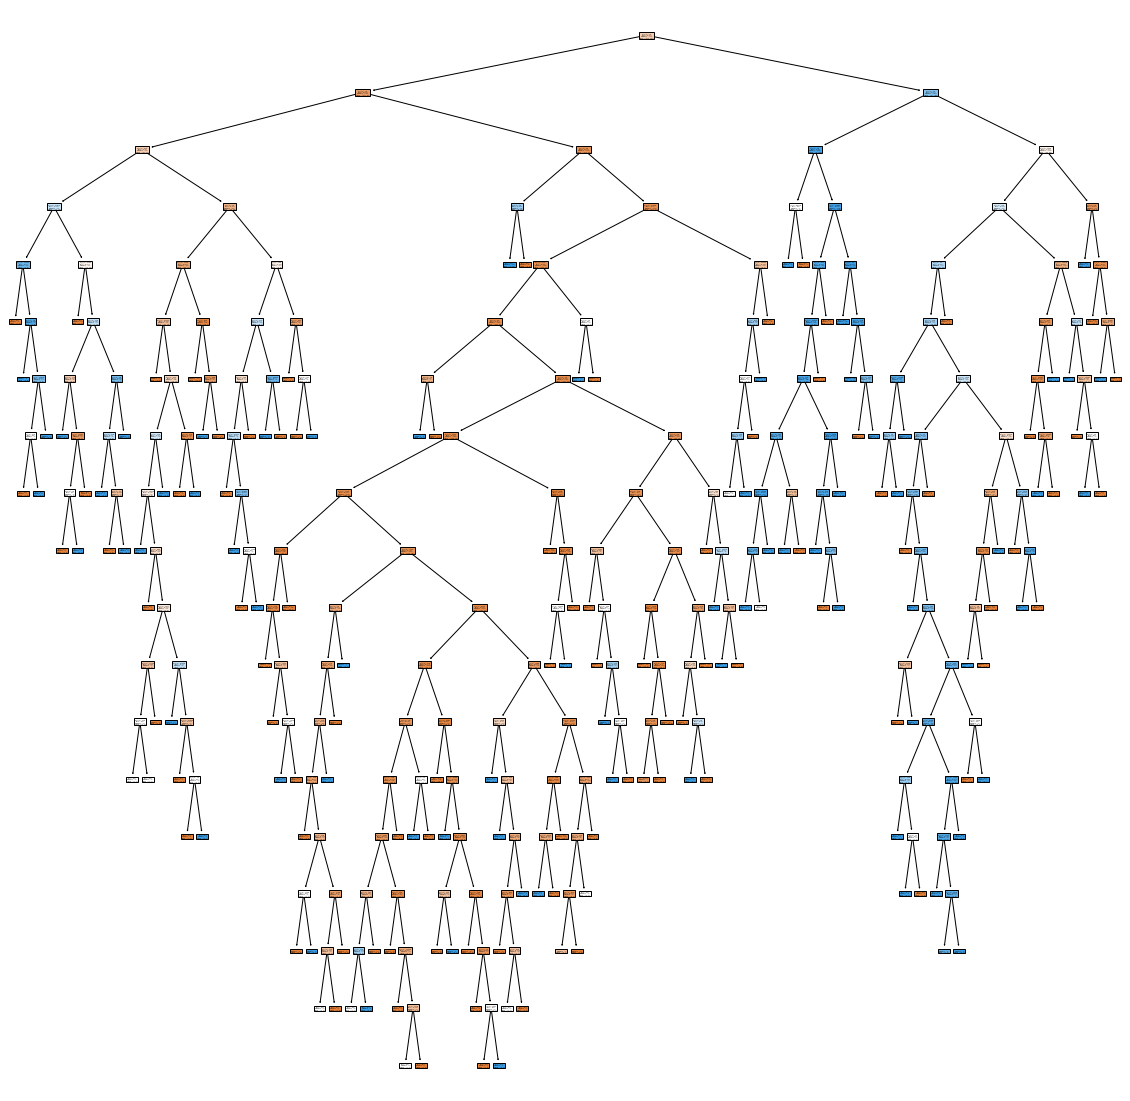

In [41]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled =True)

In [42]:
path = dt.cost_complexity_pruning_path(tr_x,tr_y)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [43]:
dt_list =[]
for ccp in ccp_alphas:
    dt = DecisionTreeClassifier(random_state =8, ccp_alpha=ccp)
    dt.fit(tr_x,tr_y)
    dt_list.append(dt)
    

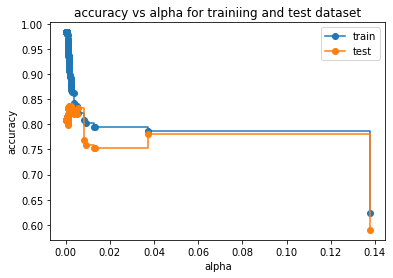

In [44]:
train_scores = [dt.score(tr_x,tr_y) for dt in dt_list]
test_scores = [dt.score(te_x,te_y) for dt in dt_list]


fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for trainiing and test dataset')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[i for i in range(1,20)],
    'min_samples_split':[i for i in range(2,20)],
    'min_samples_leaf':[i for i in range(2,20)],
    'ccp_alpha':np.linspace(0.009,.01,10)
}

In [47]:
best_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid,n_jobs=5,cv =5,verbose =1,error_score='raise')

In [48]:
best_model.fit(tr_x,tr_y)

Fitting 5 folds for each of 123120 candidates, totalling 615600 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=5,
             param_grid={'ccp_alpha': array([0.009     , 0.00911111, 0.00922222, 0.00933333, 0.00944444,
       0.00955556, 0.00966667, 0.00977778, 0.00988889, 0.01      ]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [49]:
best_model.best_params_

{'ccp_alpha': 0.00911111111111111,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [50]:
dt_best = DecisionTreeClassifier(ccp_alpha = 0.009,
 criterion= 'entropy',
 max_depth= 5,
 min_samples_leaf= 2,
 min_samples_split= 2)

In [51]:
dt_best.fit(tr_x,tr_y)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=5,
                       min_samples_leaf=2)

In [52]:
y_pred_best_train = dt_best.predict(tr_x)
y_pred_best_test = dt_best.predict(te_x)
print("test",accuracy_score(te_y,y_pred_best_test))
print("train",accuracy_score(tr_y,y_pred_best_train))

test 0.8314606741573034
train 0.819971870604782


In [53]:
import pickle

In [54]:
pickle.dump(dt_best,open('dt_best.pickle', 'wb'))

In [55]:
tr_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
568,3,0,25.0,0,0,7.2292,2.0
412,1,1,33.0,1,0,90.0000,3.0
407,2,0,3.0,1,1,18.7500,1.0
597,3,0,49.0,0,0,0.0000,1.0
526,2,1,50.0,0,0,10.5000,1.0
...,...,...,...,...,...,...,...
361,2,0,29.0,1,0,27.7208,2.0
710,1,1,24.0,0,0,49.5042,2.0
440,2,1,45.0,1,1,26.2500,1.0
175,3,0,18.0,1,1,7.8542,1.0


In [56]:
tr_x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,2.308017,0.351617,29.050633,0.514768,0.367089,31.566027,1.350211
std,0.833746,0.477811,13.020917,1.054564,0.777491,48.279019,0.629998
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.500000,0.000000,0.000000,7.925000,1.000000
50%,3.000000,0.000000,26.000000,0.000000,0.000000,14.458300,1.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,30.500000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [57]:
dvfsdv

NameError: name 'dvfsdv' is not defined

# writing to CSV

In [ ]:
df = titanic_test[['PassengerId','Survived']]
df.to_csv('Predictions.csv', index = False, header = True)